In [ ]:
import torch
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
from torchvision.transforms import ToTensor

from torchvision.datasets import MNIST        
import torchvision.transforms as transforms 

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(trainset.data.min(), trainset.data.max()))
print('Mean Pixel Value {} \nPixel Values Std: {}'.format(trainset.data.float().mean(), trainset.data.float().std()))
print('Scaled Mean Pixel Value {} \nScaled Pixel Values Std: {}'.format(trainset.data.float().mean() / 255, trainset.data.float().std() / 255))

In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
from torchvision.transforms import ToTensor

trainset = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=ToTensor(),  # transform : convert image to tensor. Normalized to 0~1
                          download=True)

print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(trainset.data.min(), trainset.data.max()))
print('Mean Pixel Value {} \nPixel Values Std: {}'.format(trainset.data.float().mean(), trainset.data.float().std()))
print('Scaled Mean Pixel Value {} \nScaled Pixel Values Std: {}'.format(trainset.data.float().mean() / 255, trainset.data.float().std() / 255))

Min Pixel Value: 0 
Max Pixel Value: 255
Mean Pixel Value 33.31842041015625 
Pixel Values Std: 78.56748962402344
Scaled Mean Pixel Value 0.13066047430038452 
Scaled Pixel Values Std: 0.30810779333114624


In [24]:
trainset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [17]:
# images, labels = next(iter(trainset))
images, labels = trainset[0]

In [18]:
images.shape 

torch.Size([1, 28, 28])

In [19]:
import numpy as np
import matplotlib.pyplot as plt

torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [20]:
image = torch_image.numpy()
image.shape

(28, 28)

In [21]:
labels

5

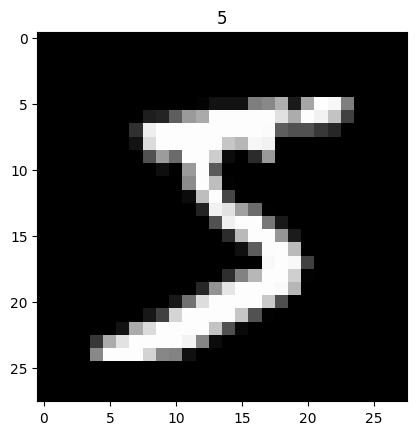

In [22]:
plt.title(labels)
plt.imshow(image,'gray')
plt.show()

In [34]:
from network import simpleMLP, TrainModel, Vis_Model
folder_path = "/home/syoon/Research/PRAM-weight-biasing/tests/TestRun/Test_2024-08-01 11:44:57"


In [36]:

best_model = Vis_Model('best_model.pth', folder_path)
best_model.Vis_weight()

AttributeError: 'Vis_Model' object has no attribute 'device'

In [24]:
import torch
import random
import os

# import customized files
from network import PruneModel, TrainModel, Vis_Model

from PyTorch_CIFAR10.cifar10_models.resnet import resnet18

In [25]:
model_name = resnet18(pretrained=True)

In [26]:
model_name

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [27]:
premodel = model_name

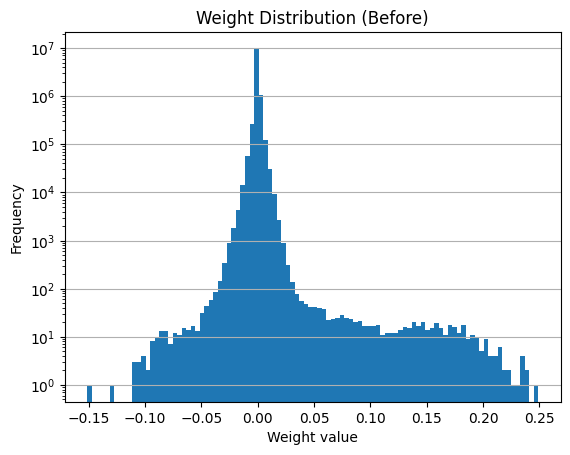

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

def extract_weights(model):
    weights = []
    for name, param in model.named_parameters():
        if 'weight' in name and len(param.size()) > 1:  # Consider only convolutional and fully connected layers
            weights.append(param.data.cpu().numpy().flatten())
    return weights

weights = extract_weights(premodel)

# Flatten the weights list
all_weights = [item for sublist in weights for item in sublist]

# Plot the distribution of weights
plt.hist(all_weights, bins=100, alpha=1)
plt.title('Weight Distribution (Before)')
plt.xlabel('Weight value')
plt.ylabel('Frequency')
plt.grid(True, axis='y')
plt.yscale('log')
plt.show()

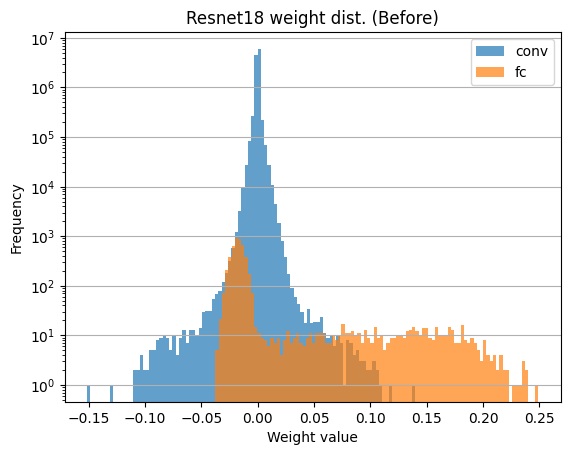

In [54]:
# cnn / fc legend
def extract_weights(model):
    conv_weights = []
    fc_weights = []
    for name, param in model.named_parameters():
        if 'weight' in name and len(param.size()) > 1:  # Consider only convolutional and fully connected layers
            if len(param.size()) == 4:  # Convolutional layers
                conv_weights.append(param.data.cpu().numpy().flatten())
            elif len(param.size()) == 2:  # Fully connected layers
                fc_weights.append(param.data.cpu().numpy().flatten())
    return conv_weights, fc_weights

conv_weights, fc_weights = extract_weights(premodel)

# Flatten the weights list
all_conv_weights = [item for sublist in conv_weights for item in sublist]
all_fc_weights = [item for sublist in fc_weights for item in sublist]

# Plot the distribution of weights
plt.hist(all_conv_weights, bins=100, alpha=0.7, label="conv")
plt.hist(all_fc_weights, bins=100, alpha=0.7, label="fc")
plt.title('Resnet18 weight dist. (Before)')
plt.xlabel('Weight value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, axis='y')
plt.yscale('log')
plt.show()

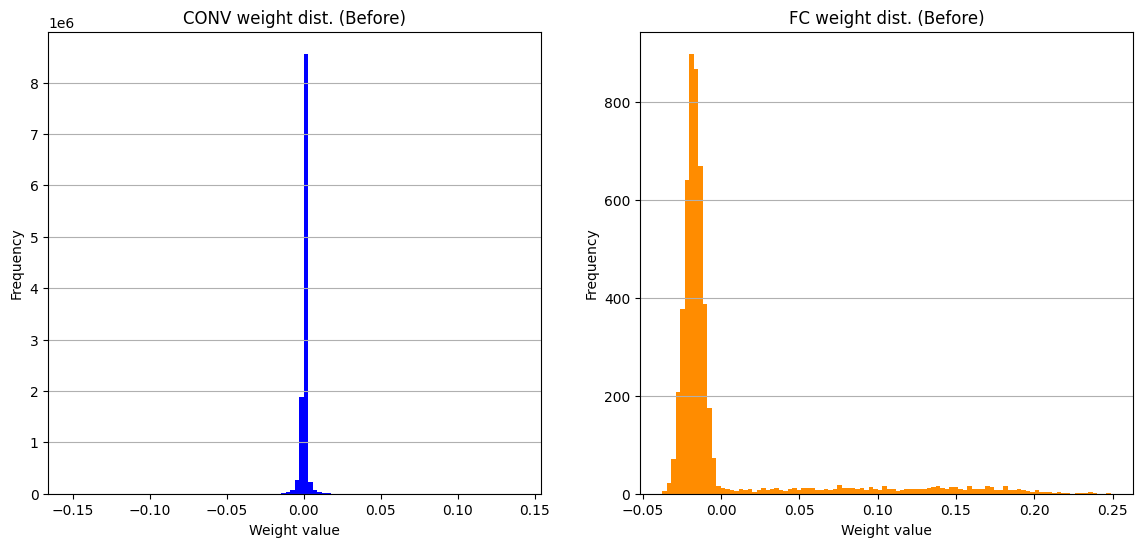

In [72]:
# Plot the distribution of weights
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot convolutional layer weights in the first subplot
plt.subplot(1,2,1)
plt.hist(all_conv_weights, bins=100, alpha=1, color='b', label="conv")
plt.xlabel('Weight value')
plt.ylabel('Frequency')
# plt.yscale('log')
plt.grid(True, axis='y')
plt.title('CONV weight dist. (Before)')

# Plot fully connected layer weights in the second subplot
plt.subplot(1,2,2)
plt.hist(all_fc_weights, bins=100, alpha=1, color='darkorange',label="fc")
plt.xlabel('Weight value')
plt.ylabel('Frequency')
# plt.yscale('log')
plt.grid(True, axis='y')
plt.title('FC weight dist. (Before)')

# Adjust the layout
# plt.tight_layout()

# Show the plots
plt.show()

In [48]:
premodel.layer1

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

In [76]:
for param in premodel.layer1.parameters():
    print(param)

Parameter containing:
tensor([[[[ 0.0063,  0.0051, -0.0012],
          [ 0.0278,  0.0267,  0.0170],
          [-0.0005,  0.0014, -0.0000]],

         [[ 0.0023,  0.0157,  0.0109],
          [ 0.0038,  0.0157,  0.0164],
          [ 0.0046,  0.0140,  0.0204]],

         [[-0.0051, -0.0060, -0.0034],
          [-0.0012,  0.0014,  0.0018],
          [-0.0024, -0.0007, -0.0031]],

         ...,

         [[ 0.0005, -0.0000, -0.0011],
          [ 0.0145,  0.0180,  0.0114],
          [ 0.0112,  0.0162,  0.0091]],

         [[-0.0021,  0.0052,  0.0009],
          [ 0.0042,  0.0125,  0.0058],
          [ 0.0034,  0.0076,  0.0040]],

         [[ 0.0035,  0.0062,  0.0048],
          [ 0.0083,  0.0102,  0.0074],
          [ 0.0007,  0.0039,  0.0017]]],


        [[[-0.0042, -0.0105, -0.0112],
          [-0.0000, -0.0007, -0.0025],
          [ 0.0076, -0.0014,  0.0006]],

         [[ 0.0016, -0.0064,  0.0056],
          [-0.0026, -0.0093,  0.0005],
          [ 0.0016, -0.0006,  0.0046]],

         

In [45]:
dict(premodel.layer4.named_parameters()).keys()

dict_keys(['0.conv1.weight', '0.bn1.weight', '0.bn1.bias', '0.conv2.weight', '0.bn2.weight', '0.bn2.bias', '0.downsample.0.weight', '0.downsample.1.weight', '0.downsample.1.bias', '1.conv1.weight', '1.bn1.weight', '1.bn1.bias', '1.conv2.weight', '1.bn2.weight', '1.bn2.bias'])

In [62]:
total_params = 0
zero_params = 0
# Iterate over all modules and sum total and zeroed-out parameters
for name, module in premodel.named_modules():
    if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
        total_params += module.weight.numel()
        zero_params += torch.sum(module.weight == 0).item()
global_sparsity = zero_params / total_params  # Sparsity ratio

print(f"Global Sparsity: {global_sparsity:.2%}")

Global Sparsity: 0.00%


In [63]:
# pruning

In [64]:
import torch.nn as nn
import torch.nn.utils.prune as prune

def apply_global_pruning(model, amount):
    parameters_to_prune = []
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
            parameters_to_prune.append((module, 'weight'))

    # Apply global pruning
    prune.global_unstructured(
        parameters_to_prune,
        pruning_method=prune.L1Unstructured,
        amount=amount,
    )
    
    for name, module in model.named_modules():
            if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
                prune.remove(module, 'weight') # fix pruned weights

    # Save the model
    # torch.save(model, 'resnet_pruned_test.pth')
    return model

In [65]:
# Apply pruning to the model (e.g., pruning 40% of the weights globally)
# apply_global_pruning(premodel, amount=0.6)
pruned_model = apply_global_pruning(premodel, amount=0.6)

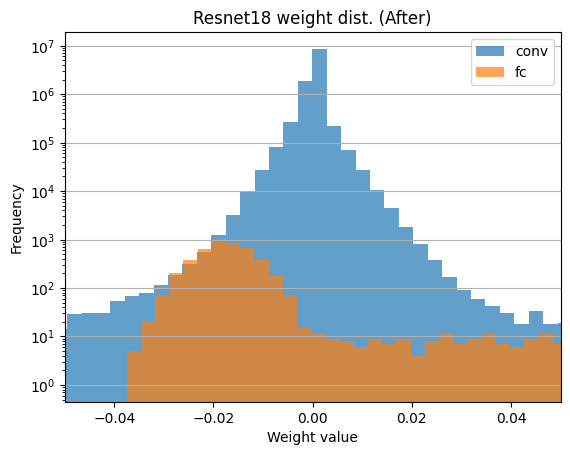

In [73]:
# postmodel = torch.load('resnet_pruned_test.pth')

def extract_weights(model):
    conv_weights = []
    fc_weights = []
    for name, param in model.named_parameters():
        if 'weight' in name and len(param.size()) > 1:  # Consider only convolutional and fully connected layers
            if len(param.size()) == 4:  # Convolutional layers
                conv_weights.append(param.data.cpu().numpy().flatten())
            elif len(param.size()) == 2:  # Fully connected layers
                fc_weights.append(param.data.cpu().numpy().flatten())
    return conv_weights, fc_weights

conv_weights2, fc_weights2 = extract_weights(pruned_model)

# Flatten the weights list
all_conv_weights2 = [item for sublist in conv_weights2 for item in sublist]
all_fc_weights2 = [item for sublist in fc_weights2 for item in sublist]

# Plot the distribution of weights
plt.hist(all_conv_weights2, bins=100, alpha=0.7, label="conv")
plt.hist(all_fc_weights2, bins=100, alpha=0.7, label="fc")
plt.title('Resnet18 weight dist. (After)')
plt.xlabel('Weight value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, axis='y')
plt.yscale('log')
plt.xlim([-0.05,0.05])
plt.show()

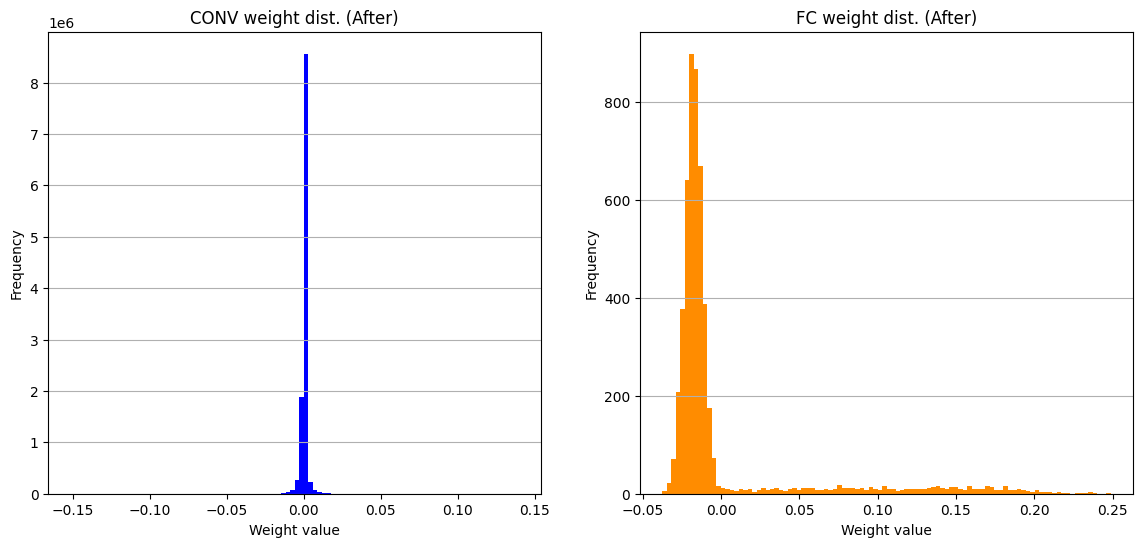

In [71]:
# Plot the distribution of weights
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot convolutional layer weights in the first subplot
plt.subplot(1,2,1)
plt.hist(all_conv_weights2, bins=100, alpha=1, color='b', label="conv")
plt.xlabel('Weight value')
plt.ylabel('Frequency')
# plt.yscale('log')
plt.grid(True, axis='y')
plt.title('CONV weight dist. (After)')

# Plot fully connected layer weights in the second subplot
plt.subplot(1,2,2)
plt.hist(all_fc_weights2, bins=100, alpha=1, color='darkorange',label="fc")
plt.xlabel('Weight value')
plt.ylabel('Frequency')
# plt.yscale('log')
plt.grid(True, axis='y')
plt.title('FC weight dist. (After)')

# Adjust the layout
# plt.tight_layout()

# Show the plots
plt.show()

In [70]:
total_params = 0
zero_params = 0
# Iterate over all modules and sum total and zeroed-out parameters
for name, module in pruned_model.named_modules():
    if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
        total_params += module.weight.numel()
        zero_params += torch.sum(module.weight == 0).item()
global_sparsity = zero_params / total_params  # Sparsity ratio

print(f"Global Sparsity: {global_sparsity:.2%}")

Global Sparsity: 60.00%


In [82]:
for name, module in pruned_model.named_modules():
    print (f'----------------\nname : {name}, \nmodule : {module}\n\n')

----------------
name : , 
module : ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

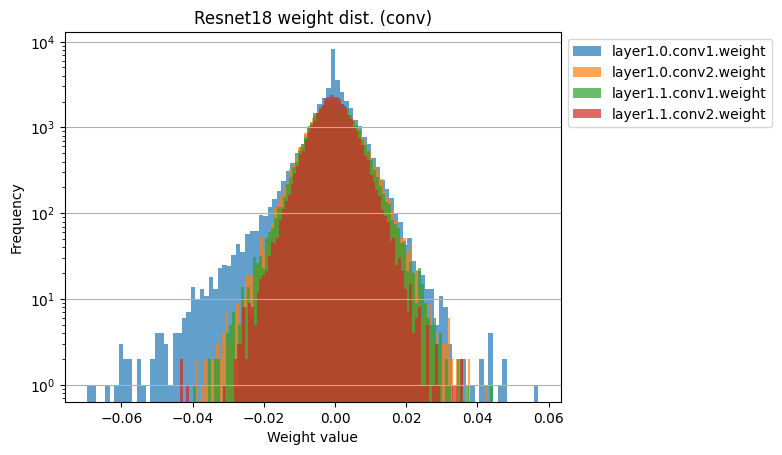

In [9]:
# cnn / fc legend
from PyTorch_CIFAR10.cifar10_models.resnet import resnet18
import matplotlib.pyplot as plt

model= resnet18(pretrained=True)

for name, param in model.named_parameters():
    if 'weight' in name and len(param.size()) > 1:  # Consider only convolutional and fully connected layers
        if len(param.size()) == 4:  # Convolutional layers
            if 'layer1' in name :
                weights = param.data.cpu().numpy().flatten()
                plt.hist(weights, bins=100, alpha=0.7, label=f'{name}')
        

plt.title('Resnet18 weight dist. (conv)')
plt.xlabel('Weight value')
plt.ylabel('Frequency')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.0))
plt.grid(True, axis='y')
plt.yscale('log')
plt.show()



# def extract_weights(model):
#     conv_weights = []
#     fc_weights = []
#     for name, param in model.named_parameters():
#         if 'weight' in name and len(param.size()) > 1:  # Consider only convolutional and fully connected layers
#             if len(param.size()) == 4:  # Convolutional layers
#                 conv_weights.append(param.data.cpu().numpy().flatten())
#             elif len(param.size()) == 2:  # Fully connected layers
#                 fc_weights.append(param.data.cpu().numpy().flatten())
#     return conv_weights, fc_weights

# conv_weights, fc_weights = extract_weights(premodel)

# # Flatten the weights list
# all_conv_weights = [item for sublist in conv_weights for item in sublist]
# all_fc_weights = [item for sublist in fc_weights for item in sublist]

# # Plot the distribution of weights
# plt.hist(all_conv_weights, bins=100, alpha=0.7, label="conv")
# plt.hist(all_fc_weights, bins=100, alpha=0.7, label="fc")
# plt.title('Resnet18 weight dist. (Before)')
# plt.xlabel('Weight value')
# plt.ylabel('Frequency')
# plt.legend()
# plt.grid(True, axis='y')
# plt.yscale('log')
# plt.show()

In [42]:
# cnn / fc legend
from PyTorch_CIFAR10.cifar10_models.resnet import resnet18
import matplotlib.pyplot as plt

model= resnet18(pretrained=True)

def plot_module_dist(module_name):

    for name, param in model.named_parameters():
        if 'weight' in name and len(param.size()) > 1:  # Consider only convolutional and fully connected layers
            if len(param.size()) == 4:  # Convolutional layers
                if module_name in name :
                    weights = param.data.cpu().numpy().flatten()
                    plt.hist(weights, bins=100, alpha=0.7, label=f'{name}')
                    plt.grid(True, axis='y')
                    plt.yscale('log')
                    plt.title('Resnet18 weight dist. (conv)')
                    plt.xlabel('Weight value')
                    plt.ylabel('Frequency')
        plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.0))
                    
def plot_one_dist(module_name, num, xmin, xmax):
    fig, axs = plt.subplots(num,1, figsize=(6, num*3))
    fig.subplots_adjust(hspace=1)

    n=0

    for name, param in model.named_parameters():
        if 'weight' in name and len(param.size()) > 1:  # Consider only convolutional and fully connected layers
            if len(param.size()) == 4:  # Convolutional layers
                if module_name in name :
                    weights = param.data.cpu().numpy().flatten()
                    axs[n].hist(weights, bins=100, alpha=0.7, label=f'{name}')
                    axs[n].set_title(f'{name}')
                    axs[n].grid(True, axis='y')
                    axs[n].set_xlim([xmin, xmax])
                    
                    n += 1
            

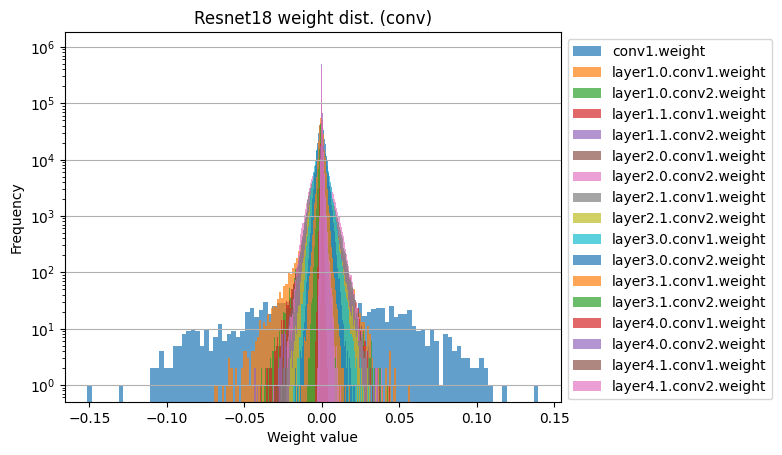

In [36]:
plot_module_dist('conv')

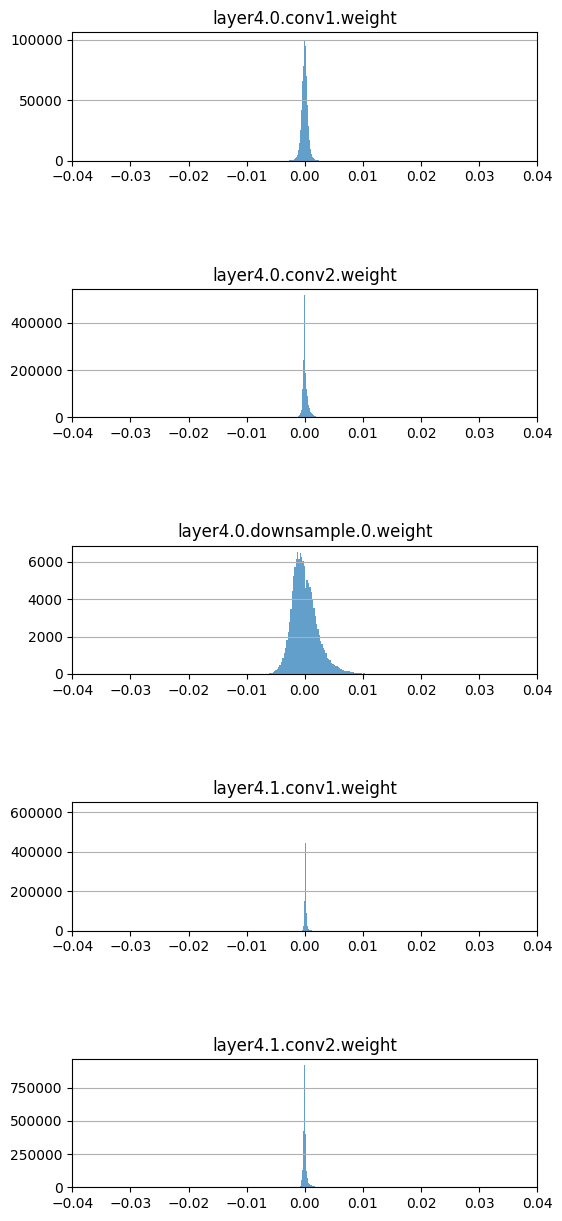

In [47]:
plot_one_dist('layer4', 5, -0.04, 0.04)
plt.show()

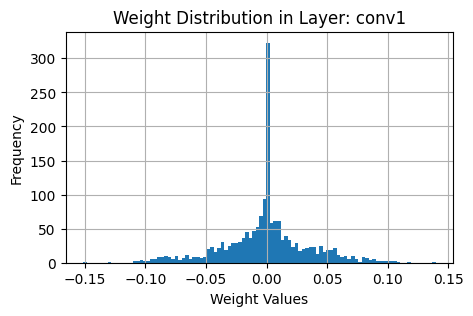

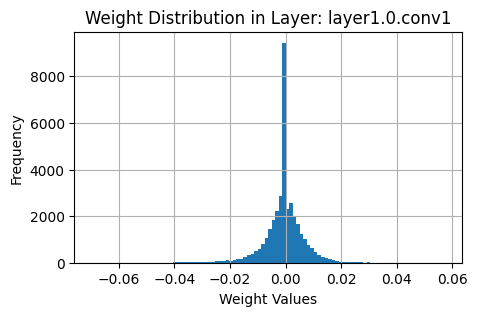

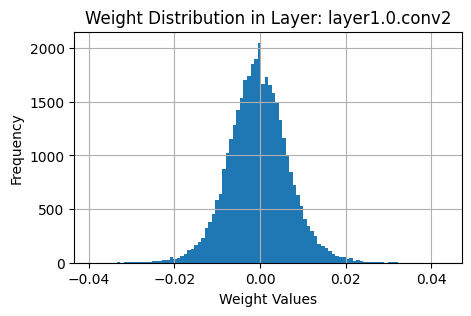

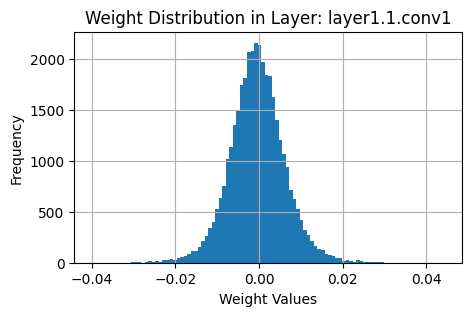

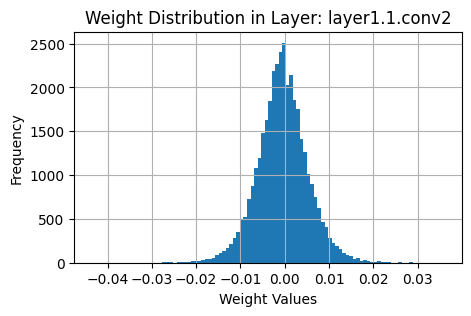

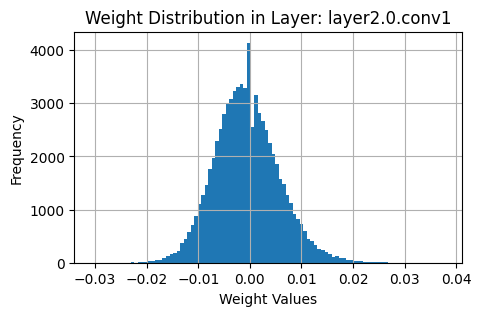

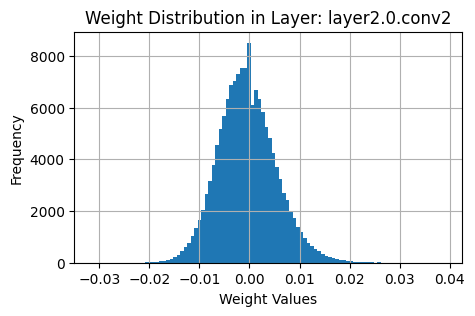

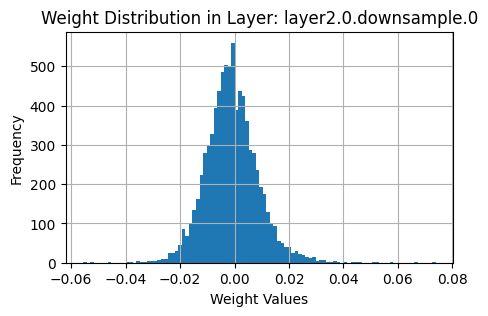

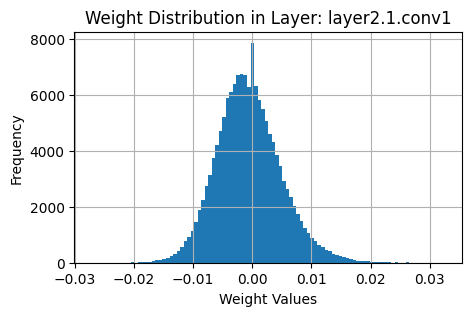

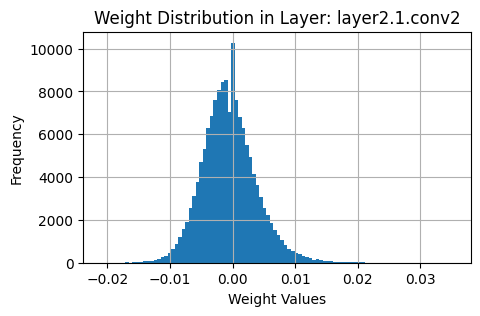

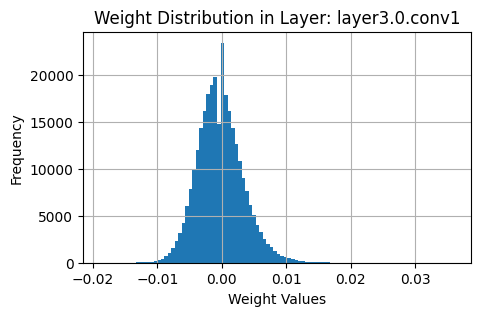

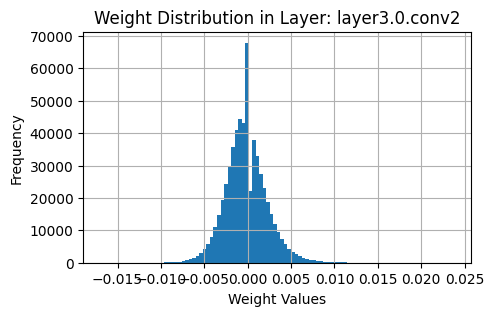

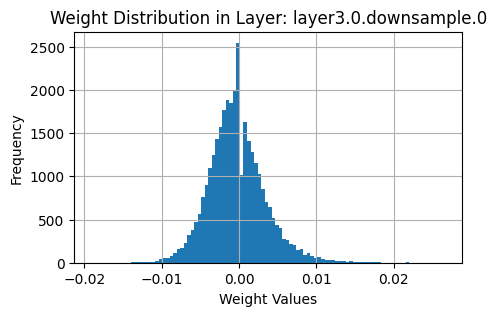

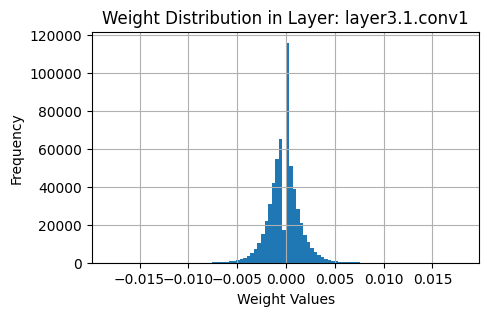

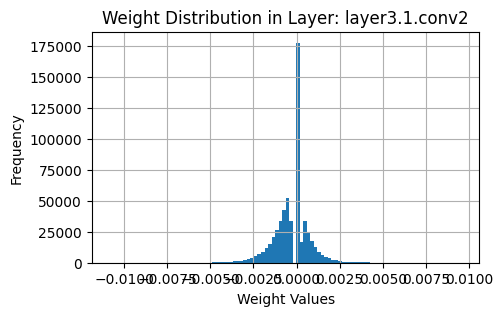

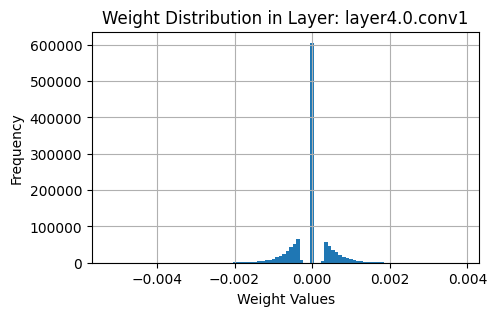

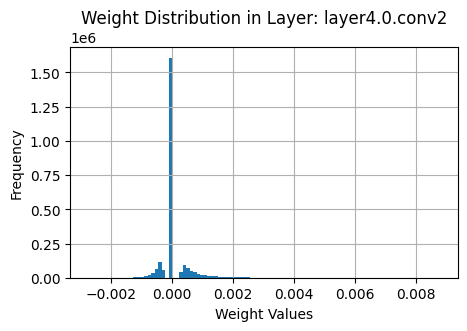

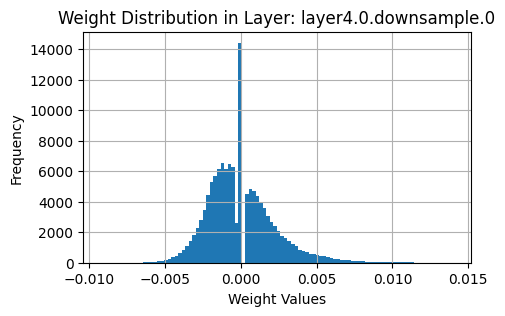

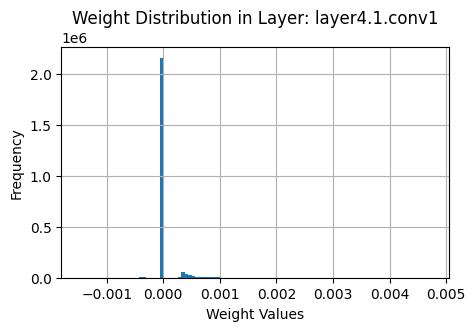

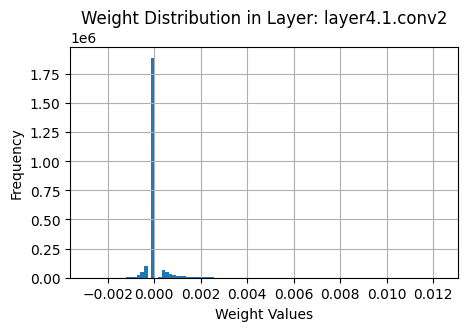

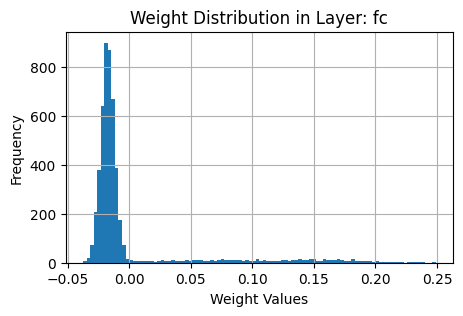

In [88]:
# Load the pretrained ResNet-18 model
premodel = resnet18(pretrained=True)

# Function to plot weights for each layer
def plot_weights(model):
    for name, module in model.named_modules():
        if isinstance(module, (torch.nn.Conv2d, torch.nn.Linear)):
            # Extract weight parameters
            weight = module.weight.data.cpu().numpy().flatten()
            
            # Plot histogram of the weights for the current layer
            plt.figure(figsize=(5, 3))
            plt.hist(weight, bins=100, alpha=1)
            plt.title(f'Weight Distribution in Layer: {name}')
            plt.xlabel('Weight Values')
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()

# Plot weights for each layer in the model
plot_weights(pruned_model)